In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import missingno as msno


df=pd.read_csv('train.csv')

# Context

In [49]:
display(df.head())
print(df.shape)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


(100000, 12)


Ok, dataset all in all have a 100000 rows and 12 columns. Every row correspond to a person, and column is a feature. 
Ok, lest go throug features description on the kaggle dataset and also get some dataframe info.

In [50]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          96708 non-null   float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Cabin        32134 non-null   object 
 11  Embarked     99750 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB
None


So, after proper analysis we could get those feature description.
|  Name  | Description | Value Type | Statistical Type |
|---         |---       |---     |---
| **PassengerId** | Passenger ID | Int | Quantative |
| **Survival** |Binary characteristics of survival (0 = No, 1 = Yes) | Binary | Categorical/Binary |
| **pclass** | A proxy for socio-economic status (SES) -1st = Upper 2nd = Middle 3rd = Lower| Numerical | Categorical |
| **Name** | Name and surname | String | Categorical |
| **Sex** | Sex | String, "male"/"female" | Categorical/Binary |
| **Age** | Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5 | Float | Quantitative |
| **SibSp** | # of siblings / spouses aboard the Titanic | Numerical | Categorical |
| **Parch** | # of parents / children aboard the Titanic | Numerical | Categorical |
| **Ticket** | Ticket number  | String | Quantitative |
| **Fare** | Passenger fare | Float | Quantitative |
| **Cabin** | 	Cabin number | Numerical | Quantitative |
| **Embarked** | Port of Embarkation 	C = Cherbourg, Q = Queenstown, S = Southampton | String | Categorical |

There is several things that makes us curious from the dataframe context. If PassengerId column even informative? Seems not, its just a way of indexin a dataframe, so it could be ignored. Also, ticket value is a string, but it could be an important integer value in that string wich could correspond with cabin number, and owerall placement aboard that could be connected with the survival rate.

In [51]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,100000.000000,96708.000000,100000.000000,100000.000000,99866.00000
mean,49999.500000,0.427740,2.106910,38.355472,0.397690,0.454560,43.92933
std,28867.657797,0.494753,0.837727,18.313556,0.862566,0.950076,69.58882
min,0.000000,0.000000,1.000000,0.080000,0.000000,0.000000,0.68000
25%,24999.750000,0.000000,1.000000,25.000000,0.000000,0.000000,10.04000
50%,49999.500000,0.000000,2.000000,39.000000,0.000000,0.000000,24.46000
75%,74999.250000,1.000000,3.000000,53.000000,1.000000,1.000000,33.50000
max,99999.000000,1.000000,3.000000,87.000000,8.000000,9.000000,744.66000


In [52]:
df.describe(include=["object", "bool"])

,Name,Sex,Ticket,Cabin,Embarked
count,100000,100000,95377,32134,99750
unique,92144,2,75331,26992,3
top,"Johnson, John",male,A/5,C19828,S
freq,31,56114,602,6,72139


Goals of this EDA: 
    describe, how features and their combinations could influence survival of the passengiers (e.g. describe groups with higher survival rate and trends)
    look for the possible additional generic features

# Data quality assessment

Just to get a quick overwiew of the patterns in data completion lets use msno package.

<AxesSubplot:>

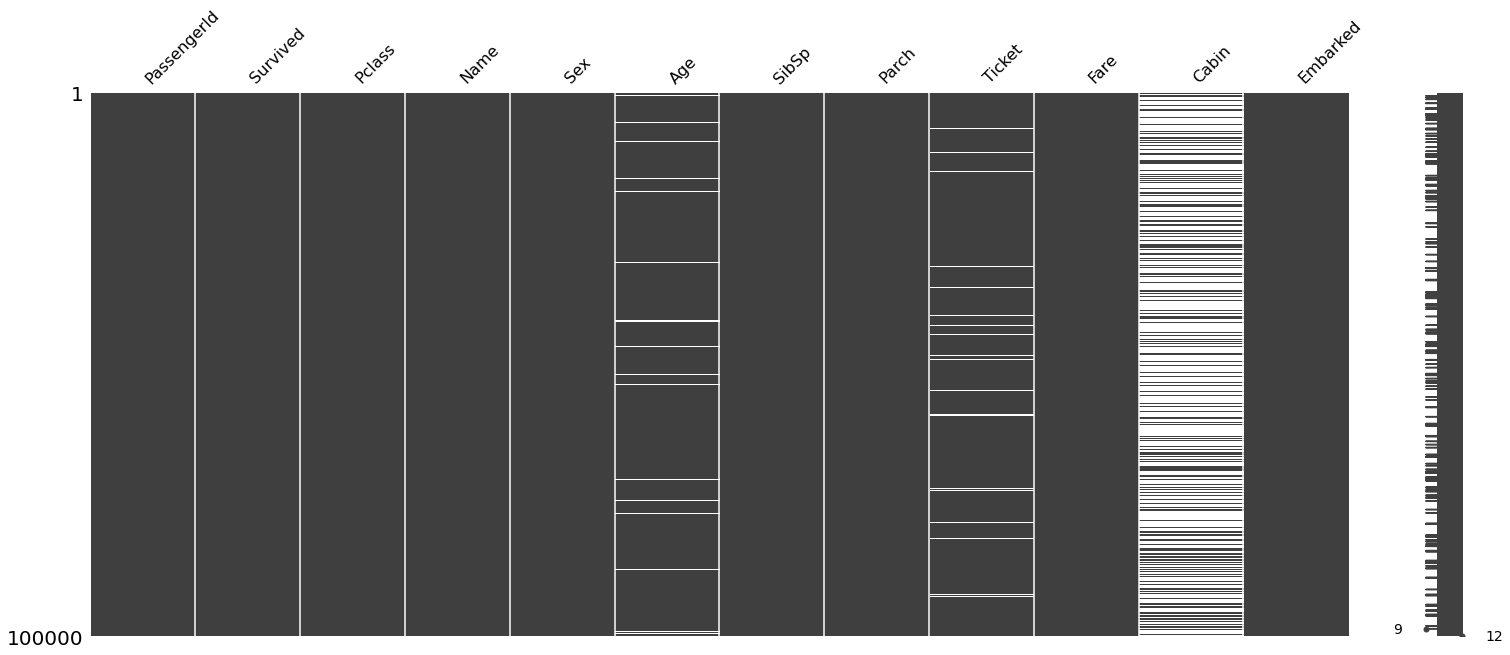

In [53]:
msno.matrix(df)

There are age and ticket column with several missing values and cabin column with a lot of missed values. Lets explore it with the numerical methods and get exact numbers

In [54]:
pd.isna(df).sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age             3292
SibSp              0
Parch              0
Ticket          4623
Fare             134
Cabin          67866
Embarked         250
dtype: int64

There are overall 3262 missing Age values, 134 missing Fare, 67866 NAs in Cabin variable, 4623 in ticket variable and 250 in Embarked variable. It seems that all variables exept cabin variable has a low proportion of missing variable.


# Data exploration

 ## Survivals 

Let's calculate and visualise distribution of our target variable - 'Survived'.

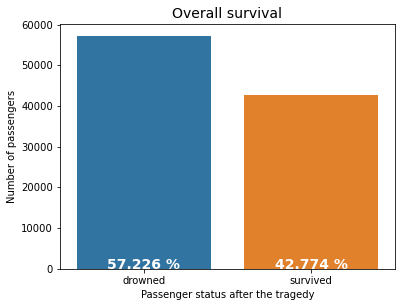

In [55]:

plt.figure(figsize=(6, 4.5)) 


ax = sns.countplot(x = 'Survived', data = df)


plt.xticks( np.arange(2), ['drowned', 'survived'] )

plt.title('Overall survival',fontsize= 14)

plt.xlabel('Passenger status after the tragedy')

plt.ylabel('Number of passengers')


labels = (df['Survived'].value_counts()/100000*100)

for i, v in enumerate(labels):
    ax.text(i, v, str(v)+' %', horizontalalignment = 'center', size = 14, color = 'w', fontweight = 'bold')
    


We have 100000 passengers in train dataset, (57,2%) of them drowned and only  (42,8%) survived.


## Sex

% of women survived:  0.7115253155903933
% of men survived:    0.20579534519014864


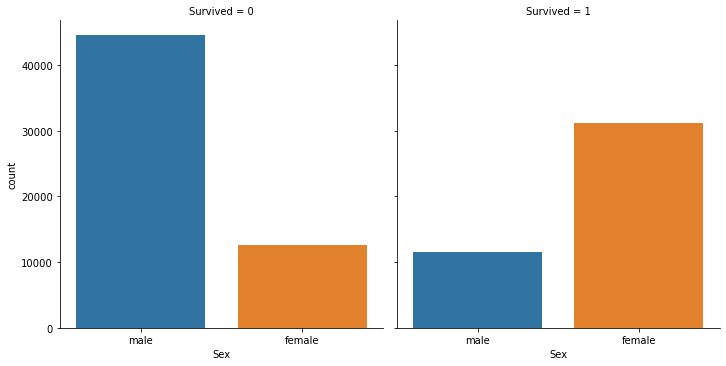

In [56]:
df.groupby(['Survived','Sex'])['Survived'].count()
sns.catplot(x='Sex', col='Survived', kind='count', data=df)
for i, v in enumerate(labels):
    ax.text(i, v-40, str(v)+' %', horizontalalignment = 'center', size = 14, color = 'w', fontweight = 'bold')
print("% of women survived: " , df[df.Sex == 'female'].Survived.sum()/df[df.Sex == 'female'].Survived.count())
print("% of men survived:   " , df[df.Sex == 'male'].Survived.sum()/df[df.Sex == 'male'].Survived.count())

Women were more likely to survive than men

74 % of women survived but only 19% of men (in training set)

## Age

Lets check overall distribution if age

C:\Users\u.username\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,count,mean,std,min,25%,50%,75%,max
Age,96708.0,38.355472,18.313556,0.08,25.0,39.0,53.0,87.0


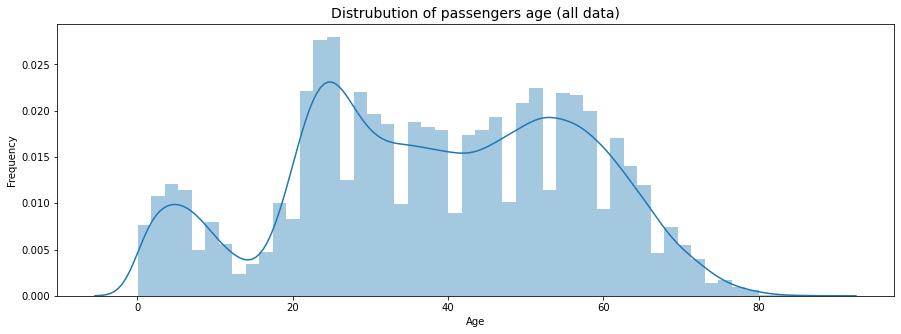

In [57]:
plt.figure(figsize=(15, 5))
sns.distplot(df["Age"])
plt.title('Distrubution of passengers age (all data)',fontsize= 14)
plt.xlabel('Age')
plt.ylabel('Frequency')
age_distr = pd.DataFrame(df['Age'].describe())
# Transpose index and columns.
age_distr.transpose()

The distribution of Age is slightly right skewed. The Age vary from about 0.08 year to 87 years with mean = 38.36.

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,55290.0,36.708695,17.809058,0.08,24.0,36.0,52.0,83.0
1,41418.0,40.553799,18.742172,0.08,27.0,43.0,55.0,87.0


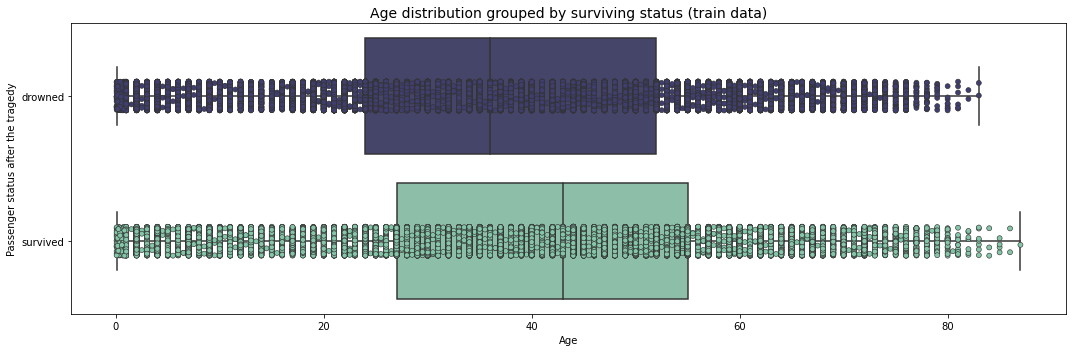

In [58]:
plt.figure(figsize=(15, 5))

# Draw a box plot to show Age distributions with respect to survival status.
sns.boxplot(y = 'Survived', x = 'Age', data =df,
     palette=["#3f3e6fd1", "#85c6a9"], fliersize = 0, orient = 'h')

# Add a scatterplot for each category.
sns.stripplot(y = 'Survived', x = 'Age', data =df,
     linewidth = 0.6, palette=["#3f3e6fd1", "#85c6a9"], orient = 'h')

plt.yticks( np.arange(2), ['drowned', 'survived'])
plt.title('Age distribution grouped by surviving status (train data)',fontsize= 14)
plt.ylabel('Passenger status after the tragedy')
plt.tight_layout()
pd.DataFrame(df.groupby('Survived')['Age'].describe())


It looks like there is a slightly bigger chance to survive for older people.The mean age of survived passenger is 40.56 which on 2.36 higher than the mean age of drowned passengers.

## Parches and siblings

C:\Users\u.username\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '9')])

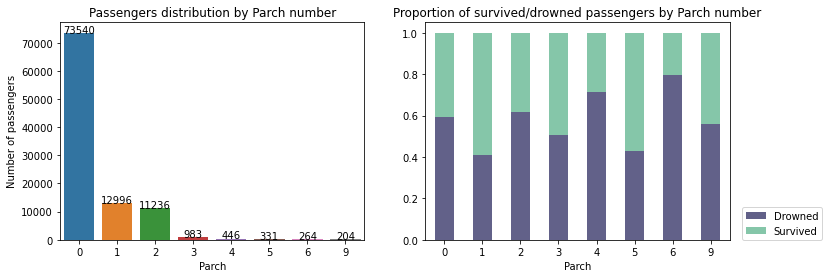

In [59]:

fig = plt.figure(figsize = (12,4))

ax1 = fig.add_subplot(121)
ax = sns.countplot(df['Parch'], ax = ax1)

# calculate passengers for each category
labels = (df['Parch'].value_counts())
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+6, str(v), horizontalalignment = 'center', size = 10, color = 'black')
    
plt.title('Passengers distribution by Parch number')
plt.ylabel('Number of passengers')

ax2 = fig.add_subplot(122)
d = df.groupby('Parch')['Survived'].value_counts(normalize = True).unstack()
d.plot(kind='bar', color=["#3f3e6fd1", "#85c6a9"], stacked='True', ax = ax2)
plt.title('Proportion of survived/drowned passengers by Parch number')
plt.legend(( 'Drowned', 'Survived'), loc=(1.04,0))
plt.xticks(rotation = False)


C:\Users\u.username\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '8')])

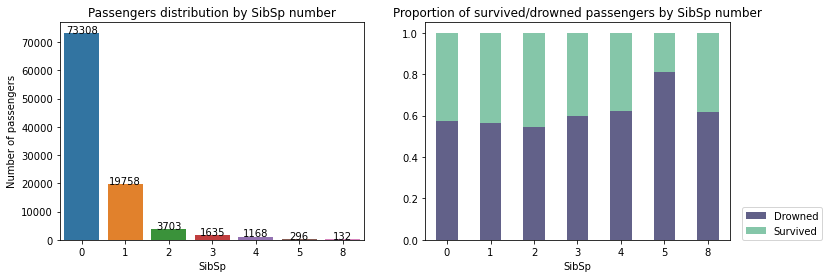

In [60]:

fig = plt.figure(figsize = (12,4))

ax1 = fig.add_subplot(121)
ax = sns.countplot(df['SibSp'], ax = ax1)

# calculate passengers for each category
labels = (df['SibSp'].value_counts())
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+6, str(v), horizontalalignment = 'center', size = 10, color = 'black')
    
plt.title('Passengers distribution by SibSp number')
plt.ylabel('Number of passengers')

ax2 = fig.add_subplot(122)
d = df.groupby('SibSp')['Survived'].value_counts(normalize = True).unstack()
d.plot(kind='bar', color=["#3f3e6fd1", "#85c6a9"], stacked='True', ax = ax2)
plt.title('Proportion of survived/drowned passengers by SibSp number')
plt.legend(( 'Drowned', 'Survived'), loc=(1.04,0))
plt.xticks(rotation = False)


Most of the passengers travelled without siblings and parches.
There no obvious trend between numbers of parches or siblings and suvival rate. But, could it be connection between family number (siblings + parches)

C:\Users\u.username\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


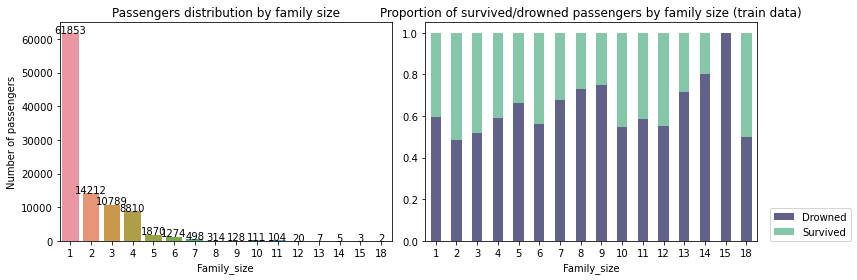

In [61]:
df['Family_size'] = df['SibSp'] + df['Parch'] + 1
fig = plt.figure(figsize = (12,4))

ax1 = fig.add_subplot(121)
ax = sns.countplot(df['Family_size'], ax = ax1)

# calculate passengers for each category
labels = (df['Family_size'].value_counts())
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+6, str(v), horizontalalignment = 'center', size = 10, color = 'black')
    
plt.title('Passengers distribution by family size')
plt.ylabel('Number of passengers')

ax2 = fig.add_subplot(122)
d = df.groupby('Family_size')['Survived'].value_counts(normalize = True).unstack()
d.plot(kind='bar', color=["#3f3e6fd1", "#85c6a9"], stacked='True', ax = ax2)
plt.title('Proportion of survived/drowned passengers by family size (train data)')
plt.legend(( 'Drowned', 'Survived'), loc=(1.04,0))
plt.xticks(rotation = False)

plt.tight_layout()


## Class

We could see strange outlier with famly size of 15, where there where no survivors. But, exept it there are no strong evidence of dependency between family size and survival rate.


C:\Users\u.username\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


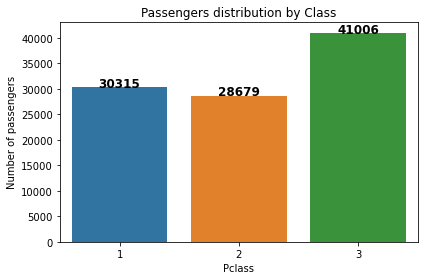

In [62]:
ax = sns.countplot(df['Pclass'])
labels = (df['Pclass'].value_counts(sort = False))
for i, v in enumerate(labels):
    ax.text(i, v+2, str(v), horizontalalignment = 'center', size = 12, color = 'black', fontweight = 'bold')

plt.title('Passengers distribution by Class')
plt.ylabel('Number of passengers')
plt.tight_layout()

Most of the Titanic's passengers were traveling third class (28679).
The second class is the smallest in terms of the number of passengers.

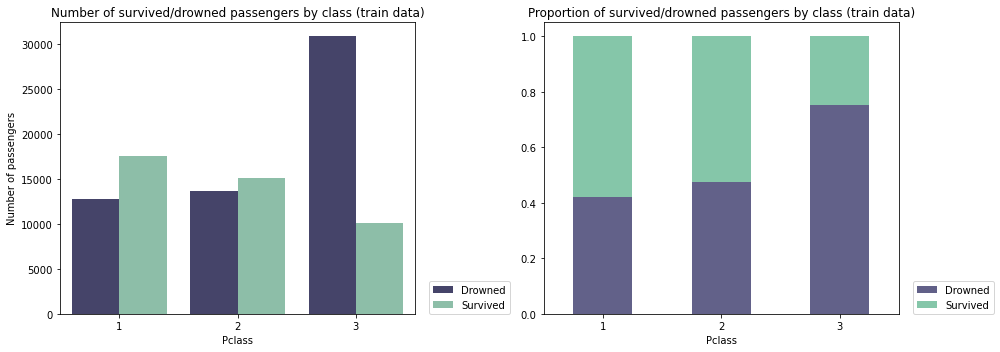

In [63]:
fig = plt.figure(figsize=(14, 5))

ax1 = fig.add_subplot(121)
sns.countplot(x = 'Pclass', hue = 'Survived', data = df, palette=["#3f3e6fd1", "#85c6a9"], ax = ax1)
plt.title('Number of survived/drowned passengers by class (train data)')
plt.ylabel('Number of passengers')
plt.legend(( 'Drowned', 'Survived'), loc=(1.04,0))
_ = plt.xticks(rotation=False)

ax2 = fig.add_subplot(122)
d = df.groupby('Pclass')['Survived'].value_counts(normalize = True).unstack()
d.plot(kind='bar', stacked='True', ax = ax2, color =["#3f3e6fd1", "#85c6a9"])
plt.title('Proportion of survived/drowned passengers by class (train data)')
plt.legend(( 'Drowned', 'Survived'), loc=(1.04,0))
_ = plt.xticks(rotation=False)

plt.tight_layout()

According to the distribution, first class has the largest number of survivors. There is a trend od decreasing survival rate with the decresing of the class.

## Cabin

There were 8 decks: the upperdeck - for lifeboats, other 7 were under it and had letter symbols:

    A: it did not run the entire length of the vessel (i.e. it did not reach from the stern to the bow of the vessel), and was intended for passengers of the 1st class.
    B: it did not run the entire length of the ship (it was interrupted by 37 meters above the C deck, and served as a place for anchors in the front).
    C: in the front part of the galley, dining room for the crew, as well as a walking area for passengers of the 3rd class.
    D: a walking area for passengers .
    E: cabins of the 1st and 2nd class.
    F: part of the passenger cabins of the 2nd class, most of the cabins of the 3rd class.
    G: did not run the entire length of the ship, the boiler rooms were located in the center.
    T - boat deck ?
    To the passengers without deck information I will imput U letter (as unknown).

In [64]:
df['deck'] = df['Cabin'].str.split('', expand = True)[1]
df.loc[df['deck'].isna(), 'deck'] = 'U'
print('Unique deck letters from the cabin numbers:', df['deck'].unique())

Unique deck letters from the cabin numbers: ['C' 'U' 'A' 'D' 'B' 'E' 'F' 'G' 'T']


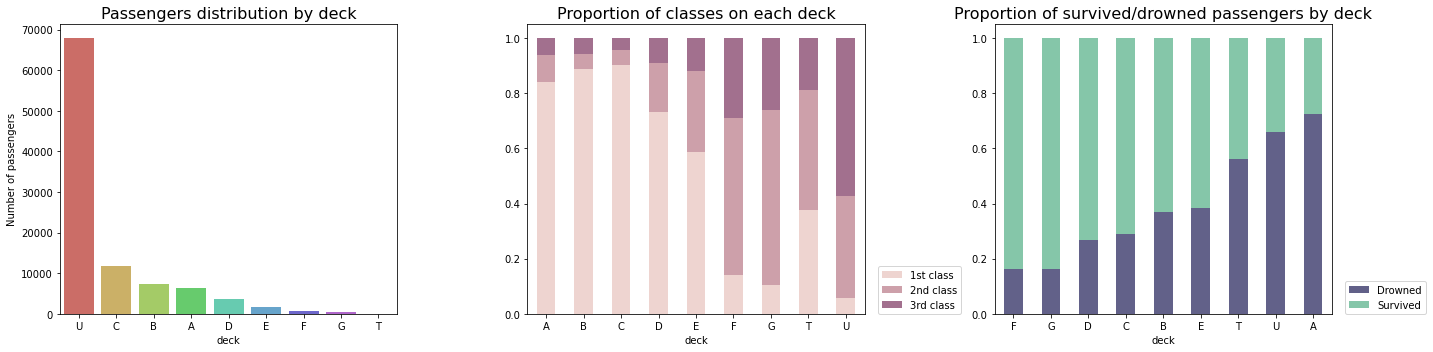

In [65]:
fig = plt.figure(figsize=(20, 5))

ax1 = fig.add_subplot(131)
sns.countplot(x = 'deck', data = df, palette = "hls", order = df['deck'].value_counts().index, ax = ax1)
plt.title('Passengers distribution by deck',fontsize= 16)
plt.ylabel('Number of passengers')

ax2 = fig.add_subplot(132)
deck_by_class = df.groupby('deck')['Pclass'].value_counts(normalize = True).unstack()
deck_by_class.plot(kind='bar', stacked='True',color = ['#eed4d0', '#cda0aa', '#a2708e'], ax = ax2)
plt.legend(('1st class', '2nd class', '3rd class'), loc=(1.04,0))
plt.title('Proportion of classes on each deck',fontsize= 16)
plt.xticks(rotation = False)

ax3 = fig.add_subplot(133)
deck_by_survived = df.groupby('deck')['Survived'].value_counts(normalize = True).unstack()
deck_by_survived = deck_by_survived.sort_values(by = 1, ascending = False)
deck_by_survived.plot(kind='bar', stacked='True', color=["#3f3e6fd1", "#85c6a9"], ax = ax3)
plt.title('Proportion of survived/drowned passengers by deck',fontsize= 16)
plt.legend(( 'Drowned', 'Survived'), loc=(1.04,0))
plt.xticks(rotation = False)
plt.tight_layout()

plt.show()

Most passengers don't have cabin numbers ('U').
The largest part of passengers with known cabin numbers were located on the 'C' deck and had 1st class ticket. 'C' deck is fifth by a percentage of the survivor.
The largest surviving rate (among passengers with known cabin numbers in training dataset) had passengers from deck 'D'.
Deck A was the closest to the deck with lifeboats, but it is the last in surviving rate (except unknown and T deck), that's seems to be an anomaly.
Also it seems tha the best survival rate is shown by F and G deck.


## Embarked

C:\Users\u.username\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


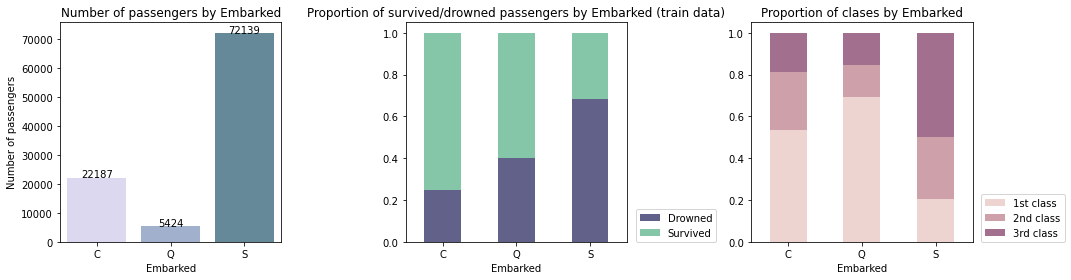

In [66]:

fig = plt.figure(figsize = (15,4))

ax1 = fig.add_subplot(131)
palette = sns.cubehelix_palette(5, start = 2)
ax = sns.countplot(df['Embarked'], palette = palette, order = ['C', 'Q', 'S'], ax = ax1)
plt.title('Number of passengers by Embarked')
plt.ylabel('Number of passengers')

# calculate passengers for each category
labels = (df['Embarked'].value_counts())
labels = labels.sort_index()
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+10, str(v), horizontalalignment = 'center', size = 10, color = 'black')
    

ax2 = fig.add_subplot(132)
surv_by_emb = df.groupby('Embarked')['Survived'].value_counts(normalize = True)
surv_by_emb = surv_by_emb.unstack().sort_index()
surv_by_emb.plot(kind='bar', stacked='True', color=["#3f3e6fd1", "#85c6a9"], ax = ax2)
plt.title('Proportion of survived/drowned passengers by Embarked (train data)')
plt.legend(( 'Drowned', 'Survived'), loc=(1.04,0))
_ = plt.xticks(rotation=False)


ax3 = fig.add_subplot(133)
class_by_emb = df.groupby('Embarked')['Pclass'].value_counts(normalize = True)
class_by_emb = class_by_emb.unstack().sort_index()
class_by_emb.plot(kind='bar', stacked='True', color = ['#eed4d0', '#cda0aa', '#a2708e'], ax = ax3)
plt.legend(('1st class', '2nd class', '3rd class'), loc=(1.04,0))
plt.title('Proportion of clases by Embarked')
_ = plt.xticks(rotation=False)

plt.tight_layout()

Most number of passengers were embarked in Southampton. Also Southampton has the biggiest proportion of drowned passengers.
More than 50% of embarked in Cherbourd and Queenstown are survied. Also, the majority of embarked here were from first class.

## Features interseption


In [67]:
pd.crosstab([df.Sex, df.Survived], [df.Pclass], margins=True).style.background_gradient(cmap='autumn_r')

Big amount of the men in third-class drawn.
Dependency between embarked and survival rate could be explained by distribution of Pclasses in the different embarked regions. 
Big amount of the drown from Southhampton could be explained by big amount of the male 3-rd class passengiers embarked there.

In [68]:
pd.crosstab([df.Sex, df.Survived], [df.Pclass,df.Embarked], margins=True).style.background_gradient(cmap='autumn_r')

Big amount of females from first class survived.

In [69]:
pd.crosstab([df.Sex, df.Survived], [df.Parch], margins=True).style.background_gradient(cmap='autumn_r')

Also, women with no parches have very high survival rate. The opposite is for men, men without parches more likely drowned. 

In [70]:
pd.crosstab([df.Pclass, df.Survived], [df.deck], margins=True).style.background_gradient(cmap='autumn_r')

Most of the 'U'(unknown) deck where from 3-rd class and drowned.

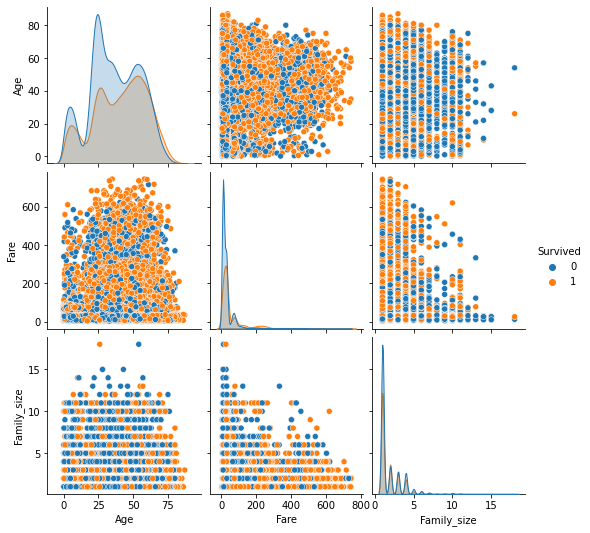

In [ ]:
sns.pairplot(df[['Age','Fare','Family_size','Survived']],hue='Survived')

There are no obvious grouping in numerical variables that could describe more frequently survivng passengers.

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,deck
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S,3,C
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S,1,U
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S,4,U
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S,1,U
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S,1,U
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,1,2,"Bell, Adele",female,62.00,0,0,PC 15008,14.86,D17243,C,1,D
99996,99996,0,2,"Brown, Herman",male,66.00,0,0,13273,11.15,NaN,S,1,U
99997,99997,0,3,"Childress, Charles",male,37.00,0,0,NaN,9.95,NaN,S,1,U
99998,99998,0,3,"Caughlin, Thomas",male,51.00,0,1,458654,30.92,NaN,S,2,U


# Summary

We have a dataset of 100000 Titanic passengers, and 12 features describing them.

There are overall 3262 missing Age values, 134 missing Fare, 67866 NAs in Cabin variable, 4623 in ticket variable and 250 in Embarked variable. It seems that all variables exept cabin variable has a low proportion of missing variable.

There are 100000 passengers in the train dataset,(57,2%) of them drowned and only  (42,8%) survived.

Women were more likely to survive than men
74 % of women survived but only 19% of men (in training set)

It looks like there is a slightly bigger chance to survive for older people.The mean age of survived passenger is 40.56 which on 2.36 higher than the mean age of drowned passengers.

Most of the passengers travelled without siblings and parches.
There no obvious trend between numbers of parches or siblings and suvival rate. But, could it be connection between family number (siblings + parches)
Exploring the title of passengers, we can see that the biggest proportion of survivors is in the "Mrs" group - a married woman. More than 80% drowned in the "Mr." group and nobody survived among the Reverend group.

Most of the Titanic's passengers were traveling third class (28679).
The second class is the smallest in terms of the number of passengers.
According to the distribution, first class has the largest number of survivors. There is a trend od decreasing survival rate with the decresing of the class.

Most passengers don't have cabin numbers.
The largest part of passengers with known cabin numbers were located on the 'C' deck and had 1st class ticket. 'C' deck is fifth by a percentage of the survivor.
The largest surviving rate (among passengers with known cabin numbers in training dataset) had passengers from deck 'D'.
Deck A was the closest to the deck with lifeboats, but it is the last in surviving rate (except unknown and T deck), that's seems to be an anomaly.
Also it seems tha the best survival rate is shown by F and G deck.

Most number of passengers were embarked in Southampton. Also Southampton has the biggiest proportion of drowned passengers.
More than 50% of embarked in Cherbourd and Queenstown are survied. Also, the majority of embarked here were from first class. 

Big amount of the men in third-class drawn.
Dependency between embarked and survival rate could be explained by distribution of Pclasses in the different embarked regions. 
Big amount of the drown from Southhampton could be explained by big amount of the male 3-rd class passengiers embarked there.

Big amount of females from first class survived.

Also, women with no parches have very high survival rate. The opposite is for men, men without parches more likely drawn. 

Most of the 'U'(unknown) deck where from 3-rd class and drowned. That's give us an idea, why so big amount of cabin variable valueas are Nan, and, as well makes a prasence cabin variable itself valuable information.

There are no obvious grouping in numerical variables that could describe more frequently survivng passengers.